In [27]:
import simpegSP as SP
from SimPEG import Mesh, np
from SimPEG.EM import Static
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
# workdir = "/Documents and Settings/"
workdir = "C:/00PLAN_UBC/seepageModeling/Cheong_dam/"
fname = "drawdown(3500000sec).csv"
#fname = "state(WL40.20m).csv"
fluiddata = SP.Utils.readSeepageModel(workdir+fname)

In [29]:
xyz =  fluiddata["xyz"]
h =  fluiddata["h"]
Sw =  fluiddata["Sw"]
Kx =  fluiddata["Kx"]
Ky =  fluiddata["Ky"]
P = fluiddata["P"]
Ux =  fluiddata["Ux"]
Uy =  fluiddata["Uy"]
Gradx = fluiddata["Gradx"]
Grady = fluiddata["Grady"]

Uy[Uy>1e10] = np.nan
mesh = fluiddata["mesh"]
xsurf, ysurf, yup = fluiddata["xsurf"], fluiddata["ysurf"], fluiddata["yup"]
hcc = fluiddata["hcc"]
actind = fluiddata["actind"]
waterind = fluiddata["waterind"]

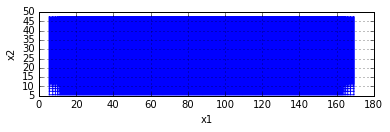

In [30]:
mesh.plotGrid()
plt.gca().set_aspect('equal', adjustable='box')

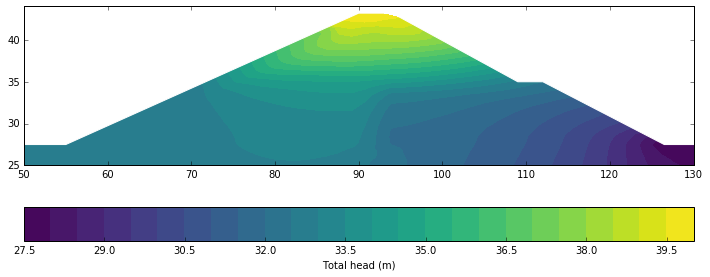

In [31]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(111)
dat = Static.Utils.plot2Ddata(xyz, h, ax=ax, ncontour=30, contourOpts={"cmap":"viridis"})
ax.fill_between(xsurf, ysurf, yup, facecolor='white', edgecolor="white")

ax.set_xlim(50, 130)
ax.set_ylim(25, 44)
cb = plt.colorbar(dat[1], orientation="horizontal")
cb.set_label("Total head (m)")

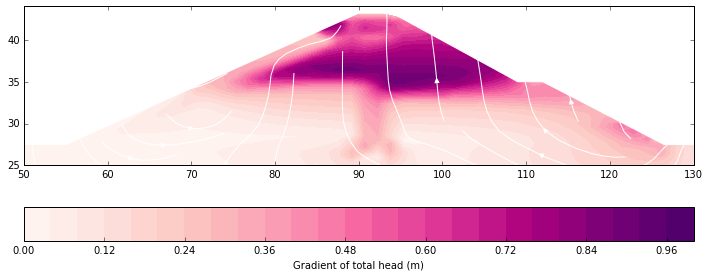

In [32]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(111)
dat = Static.Utils.plot2Ddata(xyz, -np.c_[Gradx, Grady], vec=True, ax=ax, ncontour=30, contourOpts={"cmap":"RdPu"})
ax.fill_between(xsurf, ysurf, yup, facecolor='white', edgecolor="white")

ax.set_xlim(50, 130)
ax.set_ylim(25, 44)
cb = plt.colorbar(dat[1], orientation="horizontal")
cb.set_label("Gradient of total head (m)")

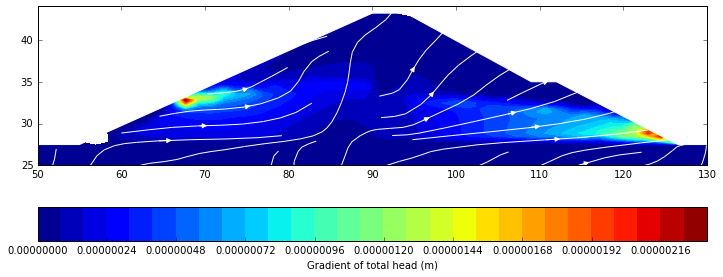

In [33]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(111)
dat = Static.Utils.plot2Ddata(xyz, np.c_[Ux, Uy], vec=True, ax=ax, ncontour=30, contourOpts={"cmap":"jet"})
ax.fill_between(xsurf, ysurf, yup, facecolor='white', edgecolor="white")

ax.set_xlim(50, 130)
ax.set_ylim(25, 44)
cb = plt.colorbar(dat[1], orientation="horizontal")
cb.set_label("Gradient of total head (m)")